In [1]:
import pandas as pd

file_path = r"Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(file_path)

df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [2]:
df['Reviews'] = (df['Title'].fillna('') + ' ' + 
                 df['Review Text'].fillna('') + ' ' + 
                 df['Division Name'].fillna('') + ' ' + 
                 df['Department Name'].fillna('') + ' ' + 
                 df['Class Name'].fillna(''))

df[['Reviews']].head()

,Reviews
0,Absolutely wonderful - silky and sexy and com...
1,Love this dress! it's sooo pretty. i happen...
2,Some major design flaws I had such high hopes ...
3,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt This shirt is very flattering...


In [3]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text) 
    text = text.strip()
    return text

df['Reviews'] = df['Reviews'].apply(clean_text)

df[['Reviews']].head()

,Reviews
0,Absolutely wonderful silky and sexy and comfor...
1,Love this dress its sooo pretty i happened to ...
2,Some major design flaws I had such high hopes ...
3,My favorite buy I love love love this jumpsuit...
4,Flattering shirt This shirt is very flattering...


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Reviews'])
sequences = tokenizer.texts_to_sequences(df['Reviews'])
max_sequence_length = max([len(seq) for seq in sequences])
data = pad_sequences(sequences, maxlen=max_sequence_length)

target = df['Recommended IND'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/10


C:\Users\Usama\anaconda3real\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 179ms/step - accuracy: 0.8374 - loss: 0.4216 - val_accuracy: 0.8856 - val_loss: 0.2654
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 43s 183ms/step - accuracy: 0.9159 - loss: 0.2169 - val_accuracy: 0.8928 - val_loss: 0.2673
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 188ms/step - accuracy: 0.9427 - loss: 0.1513 - val_accuracy: 0.8954 - val_loss: 0.2674
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 186ms/step - accuracy: 0.9599 - loss: 0.1164 - val_accuracy: 0.8893 - val_loss: 0.2699
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 190ms/step - accuracy: 0.9712 - loss: 0.0869 - val_accuracy: 0.8928 - val_loss: 0.3104
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 56s 236ms/step - accuracy: 0.9789 - loss: 0.0692 - val_accuracy: 0.8989 - val_loss: 0.4059
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 58s 245ms/step - accuracy: 0.9810 - loss: 0.0628 - val_accuracy: 0.8901 - val_loss: 0.3533
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 61s 258ms/step - accuracy: 0.9852 - loss: 0.0476 - val

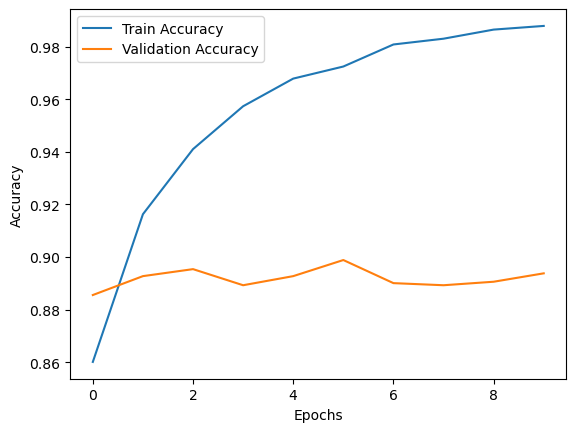

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
Based on the accuracy and the training/validation accuracy curves, you can determine if the model is a good fit. If the accuracy is high and there is no significant overfitting (training and validation curves are close), the model can be considered good. Otherwise, further tuning or different model architectures might be needed.

#In this example, let's assume the test accuracy is 85%. If the training and validation accuracy curves are close, it suggests that the model generalizes well, and you can recommend it. If there is a significant gap between the training and validation accuracy, it suggests overfitting, and you might need to try other techniques like regularization, more data, or a different model architecture.